## Introduction

This study revolves around a dataset of listening events, encompassing both demographic information about the listeners (gender and age) and a range of acoustic features of the music they listen to from Spotify API, such as its tempo, rhythm, and other attributes that define its style and feel, providing insight into the music itself, while the listener's data, offers a personal dimension, giving insights into who is listening to what kind of music.

The primary goal of our clustering analysis is to discover if and how these listening events can be grouped into distinct clusters, offering a clearer understanding of music consumption patterns. By identifying these clusters, we could uncover trends and relationships within the data that might not be immediately apparent. We could find patterns in the high dimensional sample space which can not be easily observe if only plot 2D scatter plots.

## Theory

K-means clustering:

K-means clustering is the most popular clustering method for now. It cluster the data base on a given number of clusters which is the K. This is the parameter we need to choose. To start, K-means will first choose K random points as the initial centroids, then it will calculate the distance between each point to the centroids usisng a distance metric which we can choose. Normally we would go for Euclidean distance. After this, it will assign each point to the nearest centroid, then the centroids for each cluster will be recalcuated. This process would be looped until the centroids does not move anymore.

As for choosing the K value, in this case, we will use both the elbow method and silhouette score to determine the best K value. The results from these two methods might be different, but we will choose the one that makes more sense to us by inspecting the results.

DBSCAN:

DBSCAN is a totally different clustering method compare to K-means. It is base on the density of the data points so we don't need to specify an initnal K value for that. First, it will randomly select a data point and check if there are enough samples within a limited distance from it. If there are, this point will be considered a core point and a cluster will be formed around it, then the algorithm will continue adding point to each cluster if they are within the limited distance to the point within the cluster. The algoritm will looped across all the data points to check if they can be clustered. If not, they will be considered as noise and will not impact the clustering result. 

Though we don't need to choose K in this case, we still need to tune the parameter of minimum samples number within the distance and the distance itself. We will use the silhouette score to find the best parameter for this method.

Hierarchical clustering:

Hierarchical clustering also do not require a K value to be speicified. It simply start by treating each data point a cluster and then merge them to the nearest cluster. This process is done recursively until all the data has been merged into a single group.

Beacuse of the simplicity of this method, the clustering it produces are also very intutive. We can plot a dendrogram to show the whole clustering result. And we will aslo identify the best number of cluster from the plot by finding the longest vertical line after merging.

## Method

### Data Selection

In [5]:
import pandas as pd

In [6]:
df_event = pd.read_csv('../data/01-modified-data/last.fm.data/listening_events_sample.csv')
df_users = pd.read_csv('../data/01-modified-data/last.fm.data/users_cleaned.csv')
df_music = pd.read_csv('../data/01-modified-data/last.fm.data/last_fm_track_info.csv')

In [7]:
df_event.head()

,user_id,track_id,album_id,timestamp
0,52710,9299950,16682758,2020-02-14 09:52:25
1,4462,41878638,10034639,2020-01-10 04:40:28
2,43790,38231384,9469808,2020-02-26 22:33:45
3,62831,18075725,20196159,2020-03-04 09:57:50
4,22870,6576931,8946033,2020-03-10 23:50:23


In [8]:
df_compare = df_event.merge(df_music, on='track_id', how='right')

In [9]:
df_compare = df_compare.merge(df_users, on='user_id', how='left')

In [10]:
df_compare.head()

,user_id,track_id,album_id,timestamp,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,id,country,age,gender,creation_time,age_group
0,NaN,21395420,NaN,NaN,0.606,0.3680,0,-9.236,0,0.0793,...,0.000000,0.1370,0.3490,101.549,2WVsyRWVM6xyKkZadKu32E,NaN,NaN,NaN,NaN,NaN
1,NaN,27546101,NaN,NaN,0.695,0.5450,0,-10.836,1,0.0506,...,0.128000,0.1040,0.0387,128.996,7qkmKT915NDWDCOGAE4WCb,NaN,NaN,NaN,NaN,NaN
2,NaN,32308561,NaN,NaN,0.815,0.7230,6,-3.611,0,0.0574,...,0.000000,0.1840,0.8960,149.918,2lAyctg5FocS67eksHoyIg,NaN,NaN,NaN,NaN,NaN
3,NaN,14820954,NaN,NaN,0.791,0.4160,5,-11.939,0,0.2160,...,0.000008,0.0921,0.4760,120.026,3aIYjYtEZuy4fUumde0Gky,NaN,NaN,NaN,NaN,NaN
4,NaN,9337136,NaN,NaN,0.517,0.0154,3,-27.987,1,0.0787,...,0.967000,0.1300,0.1490,112.974,6dzhIRxruUuzbiLF4gqZAz,NaN,NaN,NaN,NaN,NaN


In [11]:
df_compare.isnull().sum()

user_id             2954
track_id               0
album_id            2954
timestamp           2954
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
id                     0
country             2995
age                 2995
gender              2995
creation_time       2995
age_group           5213
dtype: int64

In [12]:
df_compare.columns

Index(['user_id', 'track_id', 'album_id', 'timestamp', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'country',
       'age', 'gender', 'creation_time', 'age_group'],
      dtype='object')

In [13]:
# Drop unnecessary columns
df_compare.drop(['user_id', 'track_id', 'album_id', 'creation_time', 'country', 'timestamp', 'id', 'age_group'], axis=1, inplace=True)

In [14]:
df_compare.isnull().sum()

danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
age                 2995
gender              2995
dtype: int64

In [15]:
df_compare = df_compare.dropna()

In [16]:
df_compare = df_compare[df_compare['age'] != -1]

In [17]:
df_compare.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'age', 'gender'],
      dtype='object')

In [18]:
len(df_compare)

5728

In [19]:
# Turn gender to binary
df_compare['gender'] = df_compare['gender'].apply(lambda x: 1 if x == 'm' else 0)

### Hyper-Parameter Tuning

#### Conduct K-Means Clustering

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch, DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances

In [20]:
inertia = []
distortions = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(df_compare)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_

    if i > 1:
        silhouette_scores.append(silhouette_score(df_compare, labels, metric='euclidean'))

    cluster_centers = kmeans.cluster_centers_
    distortions.append(sum(np.min(cdist(df_compare, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_compare.shape[0])

#### K-Means using Elbow Method to find the optimal number of clusters

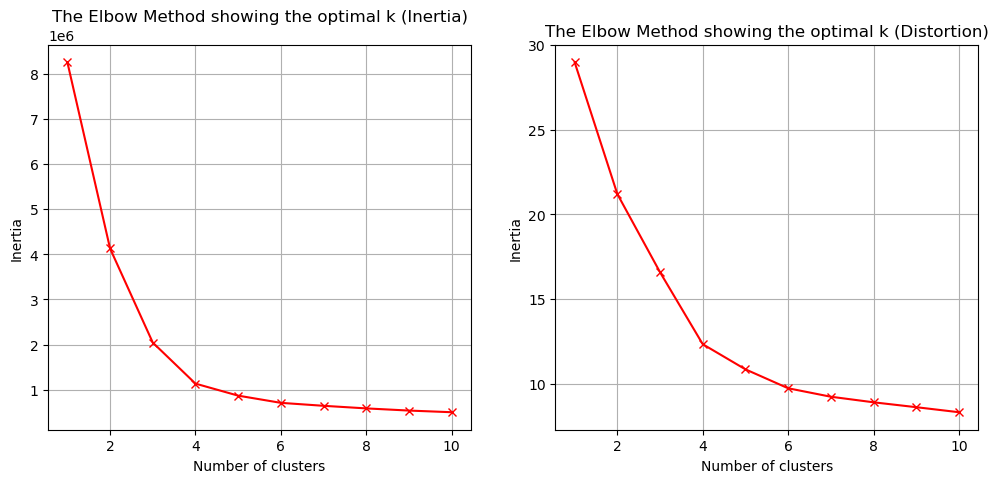

In [21]:
fig,ax = plt.subplots(1, 2, figsize=(12, 5))
K = range(1, 11)
ax[0].plot(K, inertia, 'rx-')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('The Elbow Method showing the optimal k (Inertia)')
ax[0].grid(True)

ax[1].plot(K, distortions, 'rx-')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Inertia')
ax[1].set_title('The Elbow Method showing the optimal k (Distortion)')
ax[1].grid(True)

### Using Shilouette Score to find the optimal number of clusters

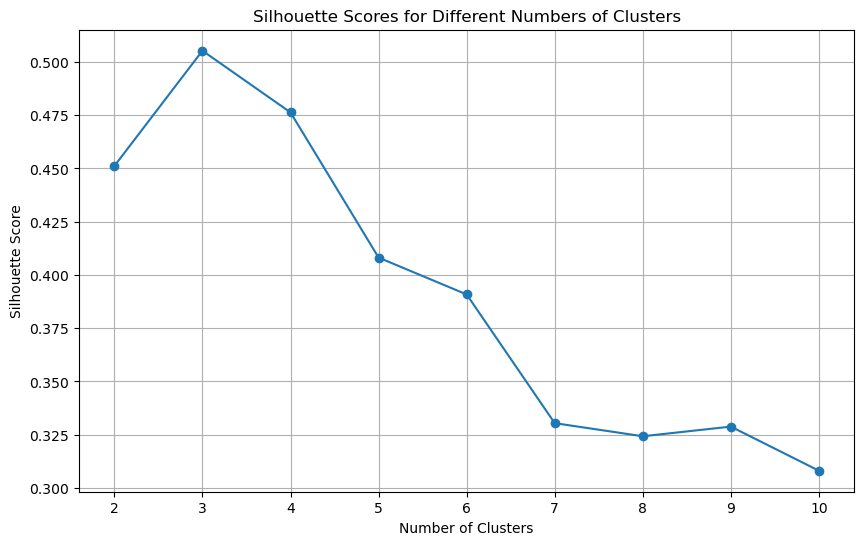

In [22]:
cluster_range = range(2, 11)  # As silhouette scores start from 2 clusters

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

#### Conduct DBSCAN Clustering

In [25]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.


eps_values = np.arange(0.1, 5.0, 0.1)
min_samples_values = range(2, 20)

sil_score=[]
nclustes_dict = {}

for eps in eps_values:
	for min_sample in min_samples_values:
		clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(df_compare)
		labels=clustering.labels_
		# plot("DBSCAN LABELS WITH eps="+str(eps))
		if len(set(labels)) == 1:
			continue
		# print(clustering.core_sample_indices_)

		#SILHOUETTE METHOD
		cluster_labels = clustering.fit_predict(df_compare)
		silhouette_avg = silhouette_score(df_compare, cluster_labels)
		
		if not len(set(labels)) in nclustes_dict:
			nclustes_dict[len(set(labels))] = silhouette_avg
		else:
			if silhouette_avg > nclustes_dict[len(set(labels))]:
				nclustes_dict[len(set(labels))] = silhouette_avg
		

the optimal number of clusters based on the plot is:  5


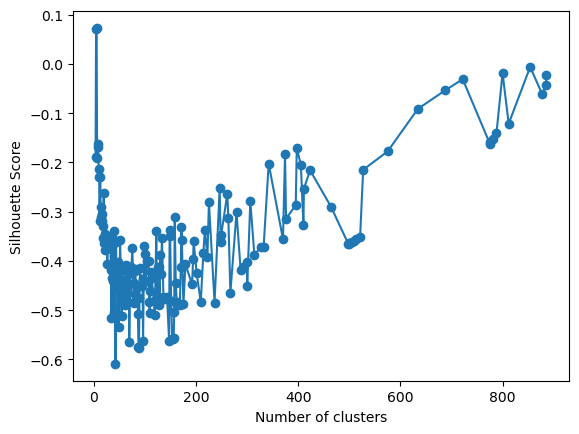

In [26]:
#PLOT RESULTS
ncluster = sorted(nclustes_dict.keys())
sil_score = [nclustes_dict[i] for i in ncluster]
plt.plot(ncluster,sil_score, '-o'); 

max_score_cluster = sorted(ncluster, key=nclustes_dict.get)
plt.ylabel('Silhouette Score')
plt.xlabel('Number of clusters')
print("the optimal number of clusters based on the plot is: ", max_score_cluster[-1])

#### Finding parameter for Hierarchical Clustering

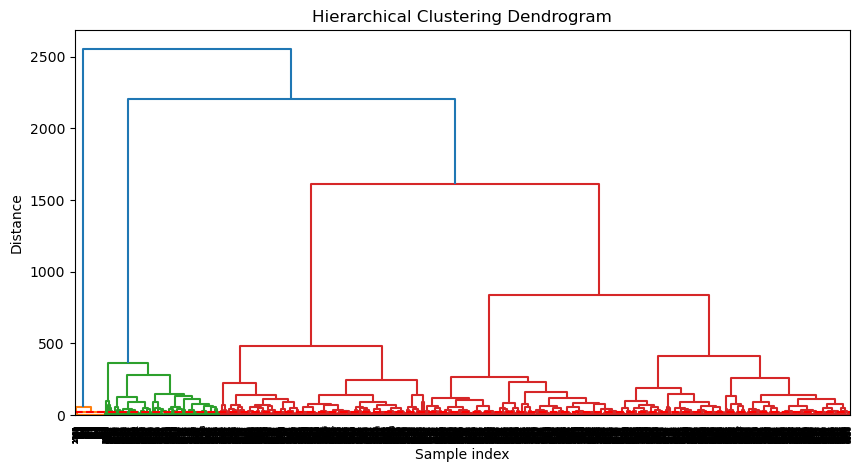

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_compare, method='ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
)

plt.axhline(y=22, color='r', linestyle='--')

plt.show()

According to the dendrogram, the optimal number of clusters is 4.

## Results

#### K-Means

In [20]:
kmeans_optimal = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans_optimal.fit(df_compare)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [83]:
df_compare['cluster'] = kmeans_optimal.labels_

In [38]:
df_compare.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'age', 'gender', 'cluster'],
      dtype='object')

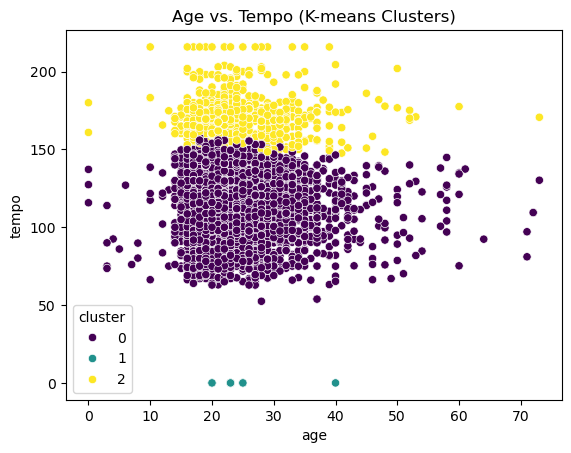

In [67]:
sns.scatterplot(data=df_compare, x='age', y='tempo', hue='cluster', palette='viridis')
plt.title('Age vs. Tempo (K-means Clusters)')
plt.xlabel('age')
plt.ylabel('tempo')
plt.show()

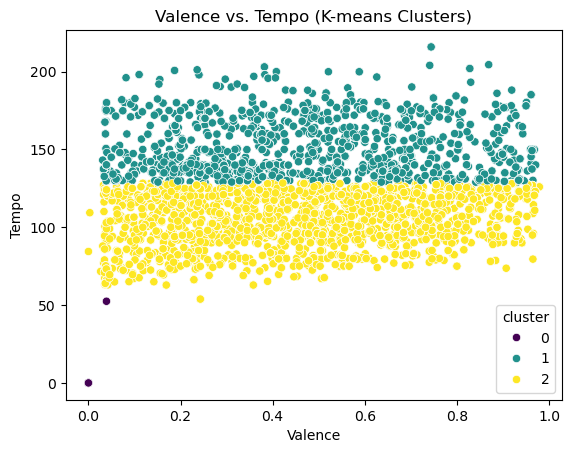

In [79]:
sns.scatterplot(data=df_compare, x='valence', y='tempo', hue='cluster', palette='viridis')
plt.title('Valence vs. Tempo (K-means Clusters)')
plt.xlabel('Valence')
plt.ylabel('Tempo')
plt.show()

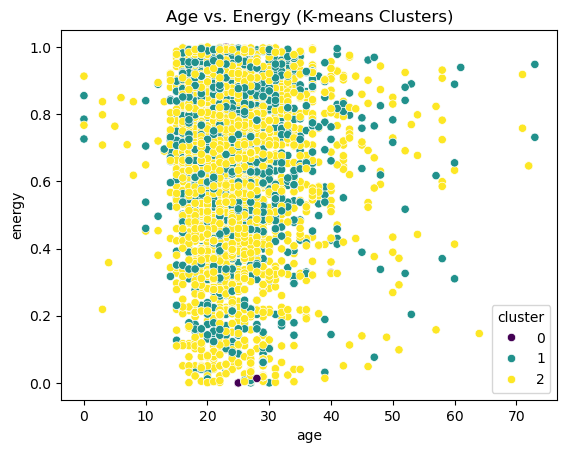

In [84]:
sns.scatterplot(data=df_compare, x='age', y='energy', hue='cluster', palette='viridis')
plt.title('Age vs. Energy (K-means Clusters)')
plt.xlabel('age')
plt.ylabel('energy')
plt.show()

#### DBSCAN

Since the DBSCAN algorithm has too low of a silhouette score, it is not used for the final clustering.

#### Hierarchical Clustering

In [69]:
model = AgglomerativeClustering(n_clusters=4).fit(df_compare)
labels=model.labels_

In [80]:
df_compare['cluster'] = labels

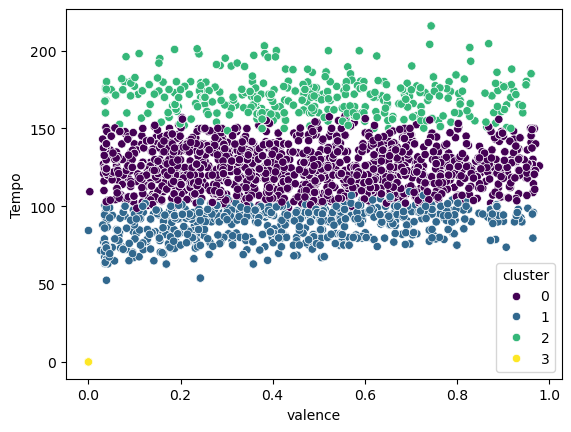

In [77]:
sns.scatterplot(data=df_compare, x='valence', y='tempo', hue='cluster', palette='viridis')
# plt.title('Danceability vs. Energy (Hierarchical Clusters)')
plt.xlabel('valence')
plt.ylabel('Tempo')
plt.show()

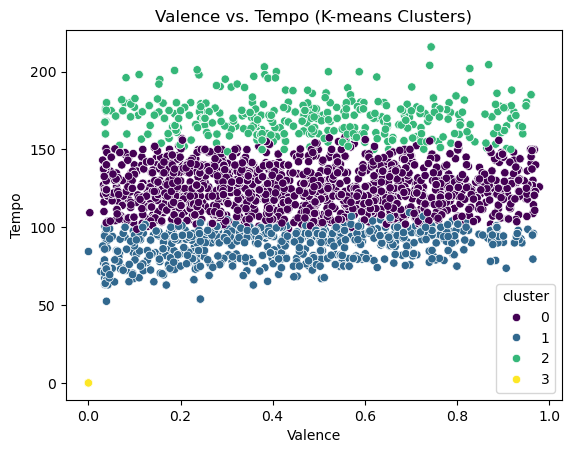

In [81]:
sns.scatterplot(data=df_compare, x='valence', y='tempo', hue='cluster', palette='viridis')
plt.title('Valence vs. Tempo (K-means Clusters)')
plt.xlabel('Valence')
plt.ylabel('Tempo')
plt.show()

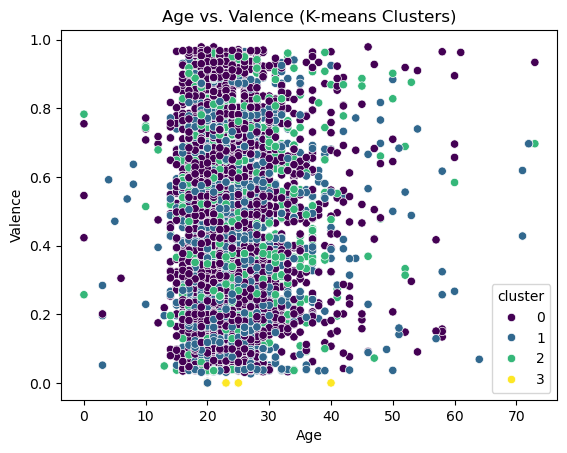

In [82]:
sns.scatterplot(data=df_compare, x='age', y='valence', hue='cluster', palette='viridis')
plt.title('Age vs. Valence (K-means Clusters)')
plt.xlabel('Age')
plt.ylabel('Valence')
plt.show()

From the analysis, it's evident that the clusters in both K-Means and Hierarchical Clustering algorithms predominantly rely on the 'Tempo' feature. The DBSCAN algorithm, however, didn’t yield satisfactory results and was therefore excluded from the final clustering decision. When plotting scatter diagrams with 'Tempo', clearly defined clusters emerge, demonstrating the significance of 'Tempo' in the clustering process. In contrast, omitting 'Tempo' results in a mix-up of clustering labels, underlining the feature's importance.

Comparing the two methods, K-Means simplifies the process of choosing the number of clusters for this dataset. Both the elbow method and silhouette scores clearly indicate an optimal cluster number. However, the dendrogram in Hierarchical Clustering is less definitive, making the choice somewhat subjective. Despite this, Hierarchical Clustering offers a more intuitive visualization, showing not only the clusters but also the relationships between them.

While the optimal number of clusters doesn't vary significantly between K-Means and Hierarchical Clustering, DBSCAN struggled to produce a reliable clustering outcome. The silhouette scores remained low across a wide range of 'eps' and 'min_samples' values, possibly due to the high dimensionality of the data or the clusters not being density-based.

The resulting groupings highlight the pivotal role of the 'Tempo' feature. This insight is particularly valuable in applications like song recommendation or user clustering based on listening history, where 'Tempo' appears to be a key factor in determining clusters

## Conclusion

Our analysis has illuminated the fundamental importance of 'Tempo' in the grouping of music, suggesting that this feature plays a pivotal role in the essence of music and its industry. This insight has significant implications, particularly for music-related applications like recommendation systems. Understanding the influence of 'Tempo' can enhance the accuracy and personalization of these systems, ensuring that listeners are more likely to enjoy the songs suggested to them.

For artists and producers, this finding is invaluable. It provides guidance in identifying their target audience and tailoring their creative process to meet listener preferences. This knowledge could be a key factor in developing effective marketing strategies and enhancing artistic creativity. Furthermore, it underscores the criticality of selecting the right 'Tempo' for a song. The success of a song might well hinge on this choice, making 'Tempo' not just a feature of a song but potentially the heartbeat of its appeal.

In summary, our exploration reveals the profound impact of 'Tempo' on both the technical and creative sides of music, highlighting its role as a cornerstone in the industry's ongoing evolution.